In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Desktop/Laptop_Price_Predictor/laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

### Data Handling

In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [11]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [12]:
df['Ram'] = df['Ram'].astype('int')
df['Weight'] = df['Weight'].astype('float')

### EDA

### 1. Price and Company

C:\Users\Jay Sunil Sonawane\AppData\Local\Temp\ipykernel_24848\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

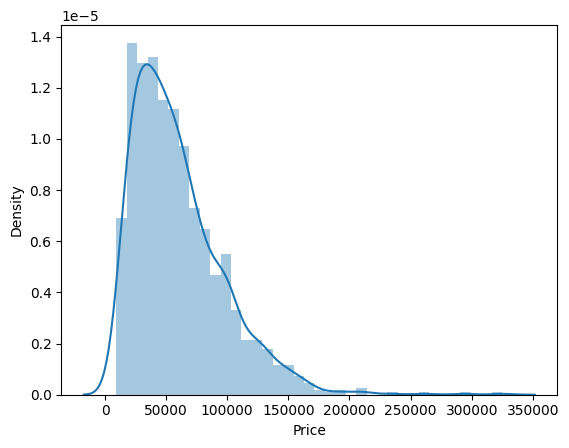

In [13]:
sns.distplot(df['Price'])

<h4>Data is slightly skewed</h4>

<Axes: xlabel='Company'>

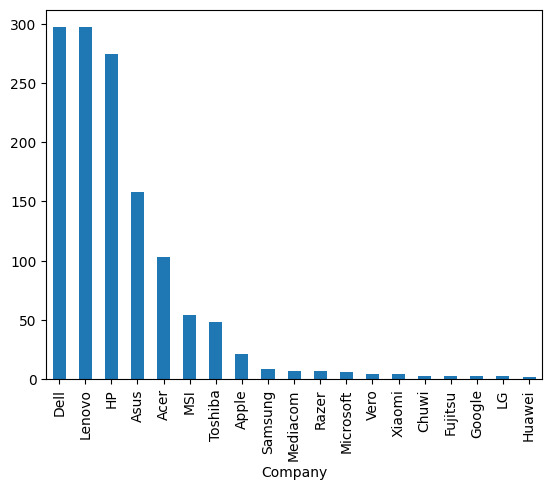

In [14]:
df['Company'].value_counts().plot(kind='bar')

In [15]:
df.groupby('Company')['Price'].mean()

Company
Acer          33394.615969
Apple         83340.499886
Asus          58830.143878
Chuwi         16745.726400
Dell          63193.755782
Fujitsu       38841.120000
Google        89386.080000
HP            56891.044222
Huawei        75870.720000
LG           111834.720000
Lenovo        57882.563200
MSI           92116.226133
Mediacom      15717.600000
Microsoft     85903.788000
Razer        178282.491429
Samsung       75308.320000
Toshiba       67549.050000
Vero          11584.404000
Xiaomi        60390.882000
Name: Price, dtype: float64

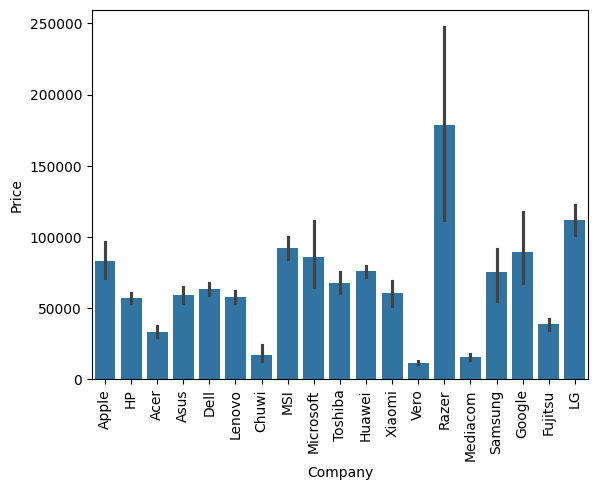

In [16]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### 2. Price and Type

<Axes: xlabel='TypeName'>

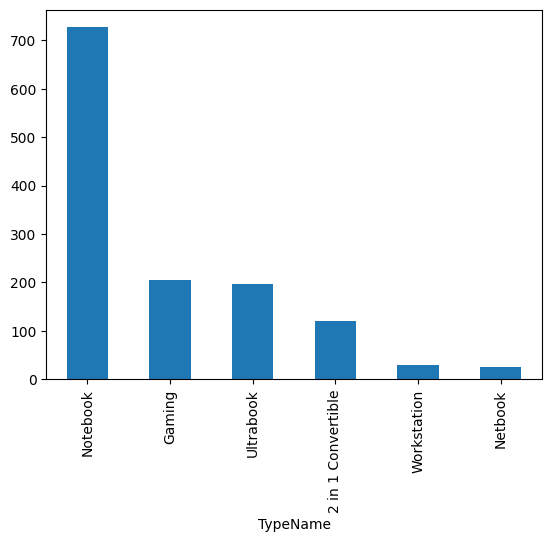

In [17]:
df['TypeName'].value_counts().plot(kind='bar')

In [18]:
df.groupby('TypeName')['Price'].mean().sort_values()

TypeName
Netbook                33898.440960
Notebook               41669.149113
2 in 1 Convertible     68326.360066
Ultrabook              82489.713429
Gaming                 92247.960187
Workstation           121497.525683
Name: Price, dtype: float64

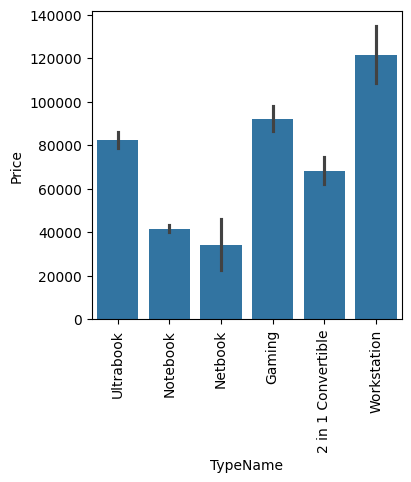

In [19]:
plt.figure(figsize=(4,4))
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### 3. Inches and Price

<Axes: xlabel='Inches', ylabel='Price'>

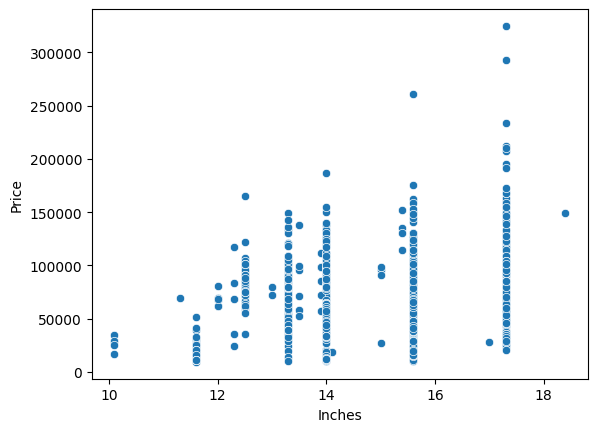

In [20]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

### 4. Screen Resolution

In [21]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [22]:
# 1️. Extract Touchscreen (binary)

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [23]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [24]:
df.groupby('Touchscreen')['Price'].mean()

Touchscreen
0    56910.518862
1    76995.205500
Name: Price, dtype: float64

In [25]:
# 2. Extract IPS Panel (binary)

df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [26]:
df['Ips'].value_counts()

Ips
0    938
1    365
Name: count, dtype: int64

In [27]:
df.groupby('Ips')['Price'].mean()

Ips
0    54012.931154
1    74922.017780
Name: Price, dtype: float64

In [28]:
# 3. Extract Resolution Width and Height
resolution = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df['X_res'] = resolution[0].apply(lambda x: int(x.split('x')[0]))
df['Y_res'] = resolution[0].apply(lambda x: int(x.split('x')[1]))

In [29]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [30]:
# 4. Compute Pixels Per Inch (PPI)

df['ppi'] = ((df['X_res']**2 + df['Y_res']**2)**0.5 / df['Inches']).astype('float')

In [31]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [32]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [33]:
df.drop(columns=['Inches','X_res','Y_res'], inplace=True)

### 4. CPU

In [34]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [35]:
# 1. CPU name
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [36]:
# 2. Classify CPUs into categories
def fetch_processor(text):
    if 'Intel Core i7' in text:
        return 'Intel Core i7'
    elif 'Intel Core i5' in text:
        return 'Intel Core i5'
    elif 'Intel Core i3' in text:
        return 'Intel Core i3'
    elif 'Intel Celeron' in text:
        return 'Intel Celeron'
    elif 'Intel Pentium' in text:
        return 'Intel Pentium'
    elif 'AMD Ryzen' in text:
        return 'AMD Ryzen'
    elif 'AMD A' in text:
        return 'AMD A'
    elif 'AMD E' in text:
        return 'AMD E'
    elif 'AMD FX' in text:
        return 'AMD FX'
    else:
        return 'Other'
        
df['Cpu Brand'] = df['Cpu'].apply(fetch_processor)


In [37]:
df['Cpu Brand'].value_counts()

Cpu Brand
Intel Core i7    527
Intel Core i5    423
Intel Core i3    136
Intel Celeron     88
AMD A             47
Other             37
Intel Pentium     30
AMD E              9
AMD Ryzen          4
AMD FX             2
Name: count, dtype: int64

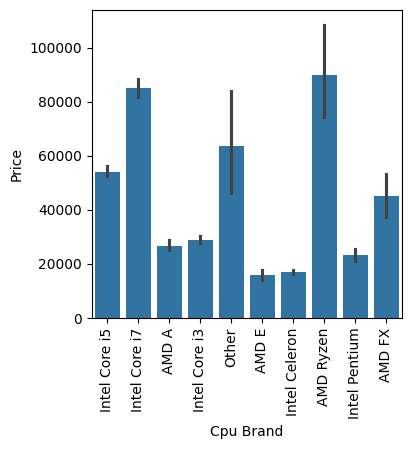

In [38]:
plt.figure(figsize=(4,4))
sns.barplot(x=df['Cpu Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
df.drop(columns=['Cpu','Cpu Brand'],inplace=True)

In [40]:
df['Ram'].value_counts()

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

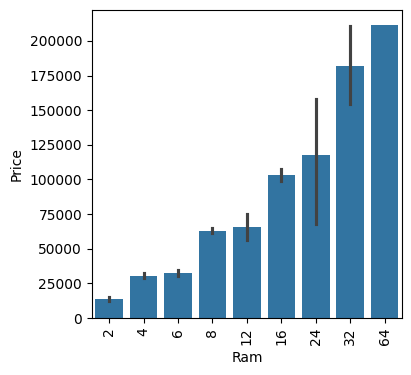

In [41]:
plt.figure(figsize=(4,4))
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### 5. Memory

In [42]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [43]:
# 1. Clean the text

df['Memory'] = df['Memory'].str.replace(r'\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
df['Memory'] = df['Memory'].str.replace('Flash Storage', 'Flash_Storage')
df['Memory'] = df['Memory'].str.replace('SSD', 'SSD')
df['Memory'] = df['Memory'].str.replace('HDD', 'HDD')
df['Memory'] = df['Memory'].str.replace('Hybrid', 'Hybrid')

In [44]:
# 2. Handle combinations (like “256GB SSD + 1TB HDD”)
df['Memory'] = df['Memory'].str.replace(r'\s+', '', regex=True)
df['Memory'] = df['Memory'].str.split('+')

In [45]:
# Initialize columns
df['HDD'] = 0
df['SSD'] = 0
df['Hybrid'] = 0
df['Flash_Storage'] = 0

In [46]:
# Parse each part and fill corresponding columns

for i in range(len(df)):
    for part in df['Memory'][i]:
        if 'HDD' in part:
            df.loc[i, 'HDD'] = int(part.replace('HDD', ''))
        elif 'SSD' in part:
            df.loc[i, 'SSD'] = int(part.replace('SSD', ''))
        elif 'Hybrid' in part:
            df.loc[i, 'Hybrid'] = int(part.replace('Hybrid', ''))
        elif 'Flash_Storage' in part:
            df.loc[i, 'Flash_Storage'] = int(part.replace('Flash_Storage', ''))


In [47]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.095672
SSD              0.676250
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [48]:
df.drop(columns=['Memory','Hybrid','Flash_Storage'], inplace=True)

In [49]:
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual,0,0
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0


### 6. GPU

In [50]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [51]:
# 1. Extract GPU Brand
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [52]:
# 2. keep only the main 3 brands and group others as “Other”:
df['Gpu_Brand'] = df['Gpu_Brand'].replace({'Nvidia': 'Nvidia', 
                                           'AMD': 'AMD', 
                                           'Intel': 'Intel'})
df.loc[~df['Gpu_Brand'].isin(['Intel', 'AMD', 'Nvidia']), 'Gpu_Brand'] = 'Other'


In [53]:
df.drop(columns=['Gpu'], inplace=True)


In [54]:
df.corr(numeric_only=True)['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
HDD           -0.095672
SSD            0.676250
Name: Price, dtype: float64

### 7. OpSystem

In [55]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [56]:
# Simplify OS categories
df['OpSys'] = df['OpSys'].replace({
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Windows 10 S': 'Windows',
    'macOS': 'Mac',
    'Mac OS X': 'Mac',
    'Linux': 'Linux',
    'Chrome OS': 'Chrome',
    'No OS': 'No OS',
    'Android': 'Android'
})


In [57]:
df['OpSys'].value_counts()


OpSys
Windows    1125
No OS        66
Linux        62
Chrome       27
Mac          21
Android       2
Name: count, dtype: int64

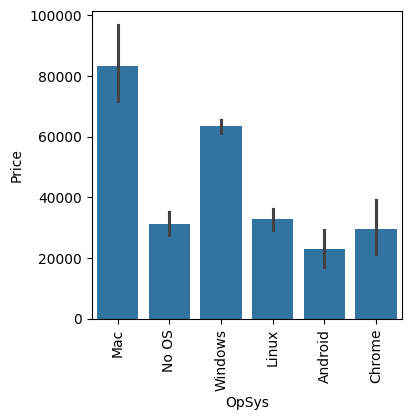

In [58]:
plt.figure(figsize=(4,4))
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

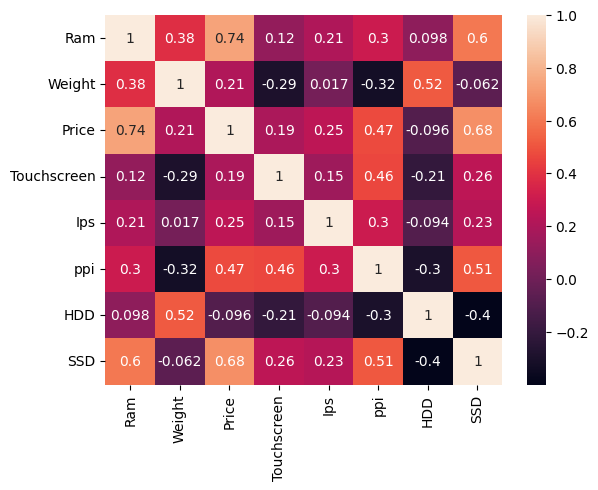

In [59]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

C:\Users\Jay Sunil Sonawane\AppData\Local\Temp\ipykernel_24848\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

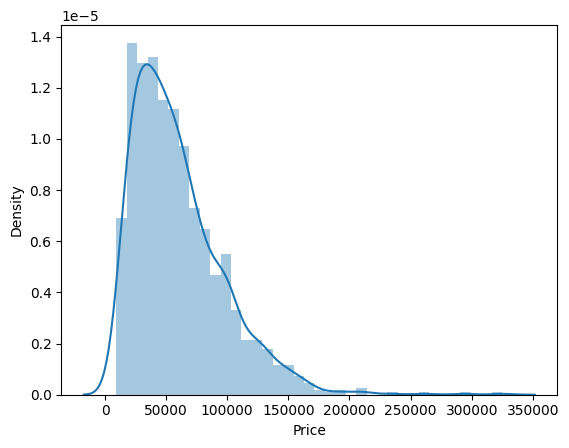

In [60]:
sns.distplot(df['Price'])

C:\Users\Jay Sunil Sonawane\AppData\Local\Temp\ipykernel_24848\2059624834.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

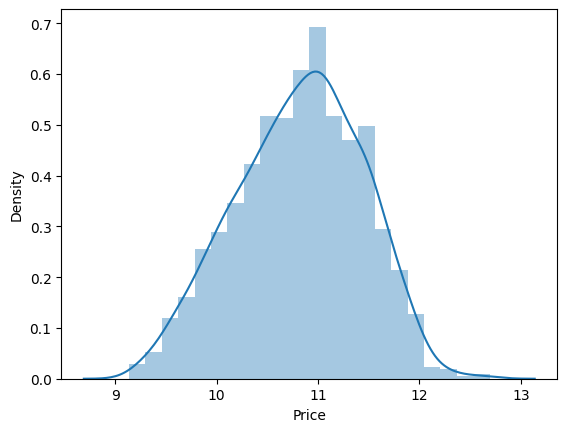

In [61]:
# as it is skewed we will apply log transformation

sns.distplot(np.log(df['Price']))

In [62]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [63]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [64]:
# categorical to numerical

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [66]:
column_trans = ColumnTransformer([
    ('cat_tnf', OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),['Company','TypeName','OpSys','Cpu Name','Gpu_Brand'])
],remainder='passthrough')

model = LinearRegression()

pipe = Pipeline([
    ('column_trans',column_trans),
    ('model',model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score on test data is',round(r2_score(y_test,y_pred),2))
print('Mean square error is',round(mean_squared_error(y_test,y_pred),2))
print('Mean absolute error is',round(mean_absolute_error(y_test,y_pred),2))

R2 Score on test data is 0.85
Mean square error is 0.06
Mean absolute error is 0.19


C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [68]:
# Column transformer (same as yours)
column_trans = ColumnTransformer([
    ('cat_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'),
     ['Company', 'TypeName', 'OpSys', 'Cpu Name', 'Gpu_Brand'])
], remainder='passthrough')

# List of models to compare
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVR': SVR()
}

# Loop through models and evaluate
results = []
for name, model in models.items():
    pipe = Pipeline([
        ('column_trans', column_trans),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    r2_test = round(r2_score(y_test, y_pred),2)
    mse = round(mean_squared_error(y_test, y_pred),2)
    mae = round(mean_absolute_error(y_test, y_pred),2)
    
    results.append({'Model': name, 'R2 Score': r2_test, 'MSE': mse, 'MAE': mae})

# Show results
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all

              Model  R2 Score   MSE   MAE
5      RandomForest      0.89  0.04  0.16
0  LinearRegression      0.85  0.06  0.19
1             Ridge      0.85  0.06  0.20
6  GradientBoosting      0.85  0.06  0.19
7          AdaBoost      0.80  0.08  0.23
4      DecisionTree      0.79  0.08  0.21
8               SVR      0.67  0.12  0.28
3        ElasticNet      0.56  0.17  0.32
2             Lasso      0.53  0.18  0.33


C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Random Forest

In [69]:
from sklearn.model_selection import GridSearchCV

# Column transformer
column_trans = ColumnTransformer([
    ('cat_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     ['Company','TypeName','OpSys','Cpu Name','Gpu_Brand'])
], remainder='passthrough')

# Pipeline
pipe = Pipeline([
    ('column_trans', column_trans),
    ('model', RandomForestRegressor(random_state=1))
])

# Parameter grid (prefix with 'model__' because it's inside the pipeline)
params = {
    'model__max_depth': range(1, 7),
    'model__min_samples_leaf': range(1, 6),
    'model__n_estimators': range(25, 201, 25)
}

# Grid Search
grid_cv_rf = GridSearchCV(estimator=pipe,
                          param_grid=params,
                          cv=5,
                          verbose=3,
                          n_jobs=-1)

# Fit
grid_cv_rf.fit(X_train, y_train)

# Predict
y_pred = grid_cv_rf.predict(X_test)

# Metrics
print('Best Parameters:', grid_cv_rf.best_params_)
print('R2 Score on test data is', round(r2_score(y_test, y_pred), 2))
print('Mean square error is', round(mean_squared_error(y_test, y_pred), 2))
print('Mean absolute error is', round(mean_absolute_error(y_test, y_pred), 2))


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'model__max_depth': 6, 'model__min_samples_leaf': 3, 'model__n_estimators': 175}
R2 Score on test data is 0.84
Mean square error is 0.06
Mean absolute error is 0.19


C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Random Forest with default parameters


In [72]:
# Column transformer
column_trans = ColumnTransformer([
    ('cat_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     ['Company', 'TypeName', 'OpSys', 'Cpu Name', 'Gpu_Brand'])
], remainder='passthrough')

# Pipeline with default Random Forest
pipe1 = Pipeline([
    ('column_trans', column_trans),
    ('model', RandomForestRegressor(random_state=1))
])

# Fit
pipe1.fit(X_train, y_train)

# Predict
y_pred = pipe1.predict(X_test)

# Metrics
print('R2 Score on test data is', round(r2_score(y_test, y_pred), 2))
print('Mean square error is', round(mean_squared_error(y_test, y_pred), 2))
print('Mean absolute error is', round(mean_absolute_error(y_test, y_pred), 2))

R2 Score on test data is 0.89
Mean square error is 0.04
Mean absolute error is 0.16


C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [73]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe1,open('pipe1.pkl','wb'))

In [74]:
X_train.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Touchscreen', 'Ips',
       'ppi', 'Cpu Name', 'HDD', 'SSD', 'Gpu_Brand'],
      dtype='object')

In [76]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [78]:
import joblib

joblib.dump(pipe1, 'laptop_model.pkl')
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [79]:
X_train

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,Ips,ppi,Cpu Name,HDD,SSD,Gpu_Brand
183,Toshiba,Notebook,8,Windows,2.00,0,0,100.454670,Intel Core i5,0,128,Intel
699,HP,Notebook,4,Windows,2.10,0,1,141.211998,Intel Core i7,500,0,AMD
419,Lenovo,Ultrabook,8,Windows,1.75,0,1,157.350512,Intel Core i7,0,256,AMD
997,Acer,Notebook,4,Windows,2.40,0,0,100.454670,Intel Pentium Quad,500,0,Intel
502,Lenovo,2 in 1 Convertible,8,Windows,1.40,1,1,158.482530,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Windows,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia
299,Asus,Ultrabook,16,Windows,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia
493,Acer,Notebook,8,Windows,2.20,0,0,100.454670,AMD A10-Series 9620P,1000,0,AMD
527,Lenovo,Notebook,8,No OS,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia
